Priyadharshini B - 24BAD093
Multilinear Regression Performance
MSE: 197.56494300428915
RMSE: 14.055779701044306
R2 Score: 0.07837800419924401


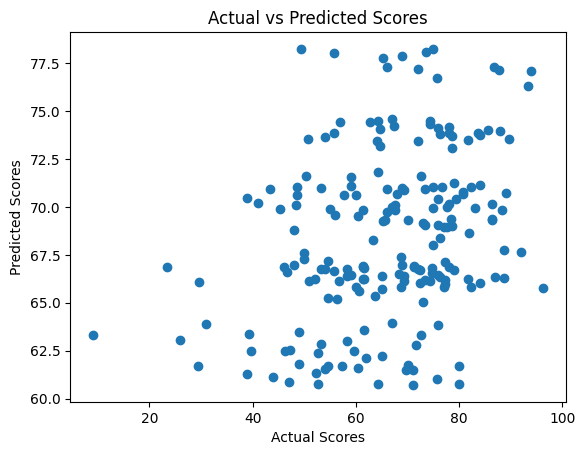

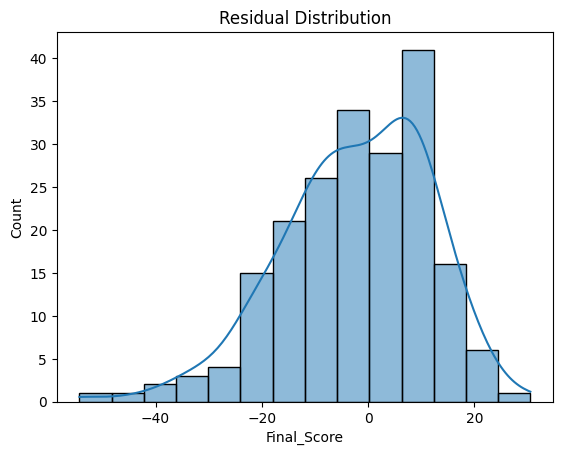

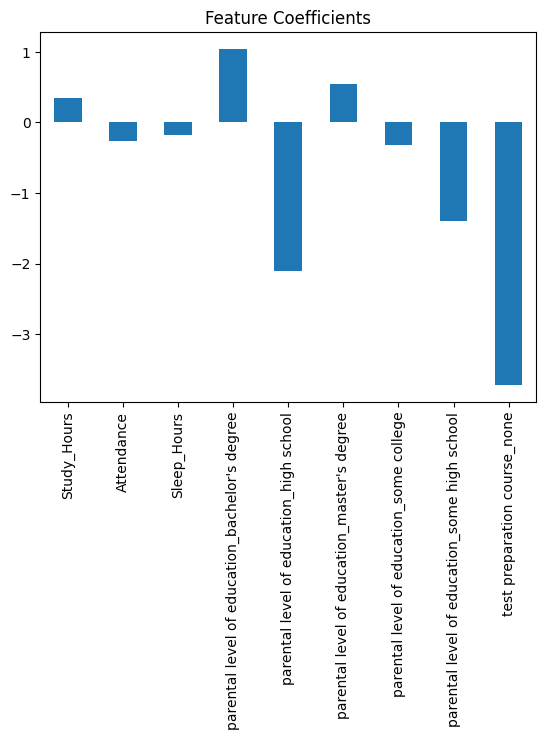

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

print("Priyadharshini B - 24BAD093")
data = pd.read_csv("/content/StudentsPerformance (1).csv")
data['Final_Score'] = (data['math score'] +
                       data['reading score'] +
                       data['writing score']) / 3

data = data[['Final_Score',
             'parental level of education',
             'test preparation course']]

np.random.seed(42)
data['Study_Hours'] = np.random.randint(1, 6, size=len(data))
data['Attendance'] = np.random.randint(60, 100, size=len(data))
data['Sleep_Hours'] = np.random.randint(4, 9, size=len(data))

data = pd.get_dummies(data, drop_first=True)

imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data.drop('Final_Score', axis=1)
y = data['Final_Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Multilinear Regression Performance")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.show()

# Residual Plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

# Coefficient Comparison
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.plot(kind='bar')
plt.title("Feature Coefficients")
plt.show()

Priyadharshini B - 24BAD093

Polynomial Degree 2
MSE: 13.760855128148345
RMSE: 3.709562659957147
R2 Score: 0.7440623896917427

Polynomial Degree 3
MSE: 13.813374257349995
RMSE: 3.716634802795399
R2 Score: 0.7430855884466044

Polynomial Degree 4
MSE: 14.118024022829639
RMSE: 3.757395909779756
R2 Score: 0.7374194192854788


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


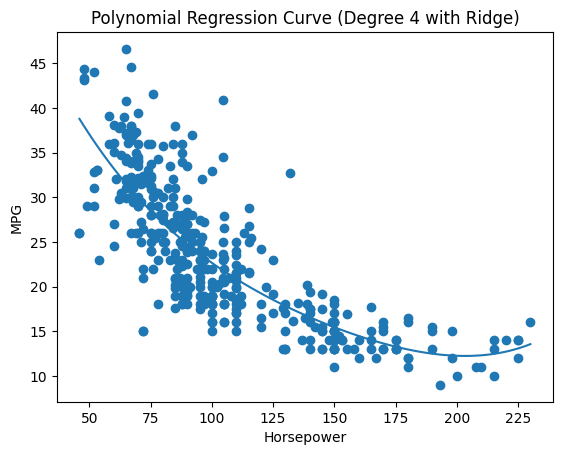

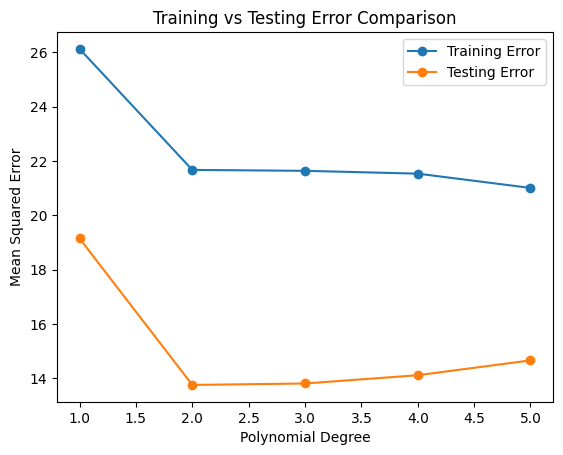

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

data = pd.read_csv("/content/auto-mpg.csv")
print("Priyadharshini B - 24BAD093")
data.replace('?', np.nan, inplace=True)
data['horsepower'] = pd.to_numeric(data['horsepower'])
data = data[['mpg', 'horsepower']]

imputer = SimpleImputer(strategy='mean')
data[['horsepower']] = imputer.fit_transform(data[['horsepower']])

X = data[['horsepower']]
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

degrees = [2, 3, 4]

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("\nPolynomial Degree", d)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)

poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

ridge = Ridge(alpha=10)
ridge.fit(X_train_poly, y_train)
ridge_pred = ridge.predict(X_test_poly)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)
X_range_poly = poly.transform(X_range_scaled)

y_range_pred = ridge.predict(X_range_poly)

plt.scatter(X, y)
plt.plot(X_range, y_range_pred)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Curve (Degree 4 with Ridge)")
plt.show()

train_errors = []
test_errors = []
degrees = [1, 2, 3, 4, 5]

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.plot(degrees, train_errors, marker='o')
plt.plot(degrees, test_errors, marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Testing Error Comparison")
plt.legend(["Training Error", "Testing Error"])
plt.show()